<a href="https://colab.research.google.com/github/rahuls321/Time-Series-Forecasting-With-Python/blob/master/ARIMA_Model_Best_Hyperparameter_Selection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


            MinTemp  MaxTemp  AvgTemp  Sunrise  Sunset
DATE                                                  
2014-01-01     33.0     46.0     40.0      657    1756
2014-01-02     35.0     50.0     43.0      657    1756
2014-01-03     36.0     45.0     41.0      657    1757
2014-01-04     32.0     41.0     37.0      658    1757
2014-01-05     24.0     38.0     31.0      658    1758


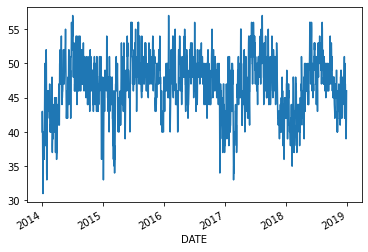

In [8]:
from pandas import read_csv
from matplotlib import pyplot
from datetime import datetime
#load dataset
series = read_csv('gdrive/My Drive/Colab Notebooks/Forecasting_Datasets/MaunaLoaDailyTemps.csv', header=0, index_col="DATE", parse_dates=True)
series=series.dropna()
print(series.head())
series['AvgTemp'].plot()
pyplot.show()

In [9]:
from statsmodels.tsa.stattools import adfuller
import pandas.util.testing as tm

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [10]:
X=series['AvgTemp']
adf_test(X)

1. ADF :  -6.554680125068778
2. P-Value :  8.675937480199557e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


In [ ]:
#!pip install pmdarima

In [11]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [12]:
stepwise_fit = auto_arima(X, trace=True,
                          suppress_warnings=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.294, Time=3.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.32 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.62 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.323, Time=3.75 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.886, Time=3.74 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.191, Time=3.76 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8307.944, Time=4.58 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.013, Time=4.67 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.649, Time=5.49 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8304.559, Time=4.82 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.393
Date:                Mon, 12 Oct 2020   AIC                           8294.785
Time:                        11:54:07   BIC                           8338.842
Sample:                             0   HQIC                          8311.039
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2330      0.370      3.331      0.001       0.508       1.958
ar.L1          0.9735      0.008    122.152      0.000       0.958       0.989
ma.L1         -0.1221      0.024     -5.137      0.000      -0.169      -0.076
ma.L2         -0.2201      0.024     -9.113      0.000      -0.267      -0.173
ma.L3         -0.2022      0.024     -8.446      0.000      -0.249      -0.155
ma.L4         -0.1371      0.023     -6.016      0.000      -0.182      -0.092
ma.L5         -0.0506      0.024     -2.072      0.038      -0.098      -0.003
sigma2         5.5035      0.172     31.914      0.000       5.165       5.841
===================================================================================
Ljung-Box (Q):                       35.25   Jarque-Bera (JB):                20.53
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [14]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [20]:
print(series.shape)
train=series.iloc[:-30]
test=series.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1821, 5)
(1791, 5) (30, 5)
MinTemp      36.0
MaxTemp      52.0
AvgTemp      44.0
Sunrise     640.0
Sunset     1743.0
Name: 2018-12-01 00:00:00, dtype: float64 MinTemp      39.0
MaxTemp      52.0
AvgTemp      46.0
Sunrise     656.0
Sunset     1754.0
Name: 2018-12-30 00:00:00, dtype: float64


In [22]:
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                     ARMA(1, 5)   Log Likelihood               -4070.198
Method:                       css-mle   S.D. of innovations              2.347
Date:                Mon, 12 Oct 2020   AIC                           8156.395
Time:                        11:57:31   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5857      0.785     59.355      0.000      45.047      48.124
ar.L1.AvgTemp     0.9856      0.007    150.630      0.000       0.973       0.998
ma.L1.AvgTemp    -0.1412      0.025     -5.735      0.000      -0.190      -0.093
ma.L2.AvgTemp    -0.2268      0.024     -9.295      0.000      -0.275      -0.179
ma.L3.AvgTemp    -0.2168      0.026     -8.416      0.000      -0.267      -0.166
ma.L4.AvgTemp    -0.1479      0.023     -6.300      0.000      -0.194      -0.102
ma.L5.AvgTemp    -0.0594      0.025     -2.411      0.016      -0.108      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0146           +0.0000j            1.0146            0.0000
MA.1            1.0883           -0.0000j            1.0883           -0.0000
MA.2            0.0555           -1.8423j            1.8431           -0.2452
MA.3            0.0555           +1.8423j            1.8431            0.2452
MA.4           -1.8432           -1.0734j            2.1330           -0.4161
MA.5           -1.8432           +1.0734j            2.1330            0.4161
-----------------------------------------------------------------------------
"""

In [42]:
start=len(train)
end=len(train)+len(test)-1 
pred = model.predict(start=1,end=end, typ='levels')

In [43]:
pred

1       41.188115
2       43.939218
3       41.774765
4       38.226294
5       33.410866
          ...    
1816    46.053370
1817    46.061036
1818    46.068591
1819    46.076038
1820    46.083377
Length: 1820, dtype: float64